In [1]:
import numpy as np
from matplotlib import pyplot as plt

from env import YoutubeEnv

In [2]:
seed = 0
evolutive = True

env = YoutubeEnv.random_env(evolutive=evolutive, seed=seed)

In [25]:
def simulate_evolution(env, seed, gamma=0.05, nb_runs=5):
    """ Simulates the evolution of tastes with a chosen evolution parameter """
    
    env.reset(seed)
    tastes = []
    
    users = list(env.users.values())
    videos = list(env.videos.values())

    u = users[0]
    tastes_idx = np.where(u.keywords > 0)[0]

    for _ in range(nb_runs):
        for v in videos:
            tastes.append(u.keywords)
            watch_time = u.watch(v)
            env.update(u, v, watch_time, gamma)

    tastes.append(u.keywords)
    tastes = np.array(tastes)
    tastes_3 = tastes[:, tastes_idx]
        
    colors = ["b", "r", "g"]
    labels = ["keyword 1", "keyword 2", "keyword 3"]
    times = np.arange(len(tastes))
    for j in range(3):
        plt.plot(times, tastes_3[:, j], colors[j] + "o", label=labels[j])

    plt.legend(loc="upper right")
    plt.title("Evolution with gamma = {}".format(gamma))
    plt.show()

In [26]:
nb_runs = 5

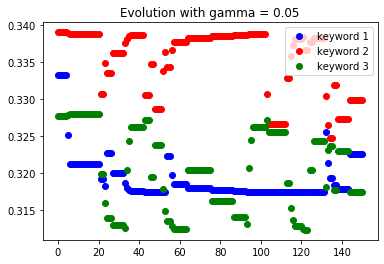

In [27]:
gamma = 0.05
simulate_evolution(env, seed, gamma=gamma, nb_runs=nb_runs)

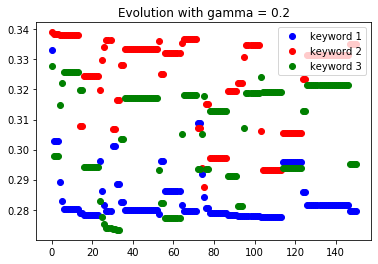

In [28]:
gamma = 0.2
simulate_evolution(env, seed, gamma=gamma, nb_runs=nb_runs)

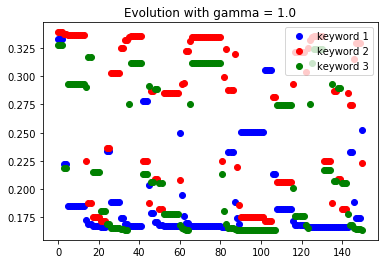

In [29]:
gamma = 1.
simulate_evolution(env, seed, gamma=gamma, nb_runs=nb_runs)